# Group-5,Nitish goyal(18510053),Rachana choudhary(18510063)

# Billiard ball problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import random

In [2]:
global N
N=100000

In [3]:
def stad_bound(alpha):
    g=np.linspace(np.pi*3/2,np.pi/2,50)
    xo=[]
    yo=[]
    for i in g:
        xo.append(np.cos(i))
        yo.append(np.sin(i))

    xo=np.array(xo)
    yo=np.array(yo)
    d=np.full(50,alpha)

    plt.plot(xo-d,yo,'c')
    plt.plot(d-xo,yo,'c')
    plt.plot([alpha,-alpha],[1,1],'c')
    plt.plot([alpha,-alpha],[-1,-1],'c')
   
    return 



In [4]:
def init_vals(x0,y0,vx0,vy0,alpha):
    x=np.zeros(N)
    y=np.zeros(N)
    vx=np.zeros(N)
    vy=np.zeros(N)
    t=np.zeros(N)
    x[0],y[0],vx[0],vy[0]=x0,y0,vx0,vy0


    return x,y,vx,vy,t,alpha
    

In [5]:
# Initial condition generator for point inside stadium(radius = 1 unit , alpha(parameter)) and velocity of same order.

def in_gen_stadium(alpha):
    init=np.random.uniform(-1-alpha,1+alpha,4)
    
    
    x=np.zeros(N)
    y=np.zeros(N)
    vx=np.zeros(N)
    vy=np.zeros(N)
  

    x[0]=init[0]
    y[0]=init[1]
    vx[0]=init[2]
    vy[0]=init[3]
   
    t=np.linspace(0,N-1,N)  
    
    if  abs(y[0])<1:
        if abs(x[0])<alpha:
            return x,y,vx,vy,t
        elif (x[0]-alpha)**2+y[0]**2<1 or (x[0]+alpha)**2+y[0]**2<1:
            return x,y,vx,vy,t
        else:
            return in_gen_stadium(alpha)
    else:
        return in_gen_stadium(alpha)
        

In [6]:
def solve_billball(x,y,vx,vy,t,alpha):
    
    for i in range(1,N):
        dt=.001
        x[i]=x[i-1]+vx[i-1]*dt    # Normal updation
        y[i]=y[i-1]+vy[i-1]*dt 
        vx[i]=vx[i-1]
        vy[i]=vy[i-1]
        t[i]=t[i-1]+dt

# Ball going out from right circle 

        if x[i]>alpha and (x[i]-alpha)**2+y[i]**2>1: 

            dt=.0001
            x1=[x[i-1]]
            y1=[y[i-1]] 
            j=0            
            while (x1[j]-alpha)**2+y1[j]**2<1:
                

                x1_new=x1[j]+vx[i-1]*dt
                x1.append(x1_new)
                y1_new=y1[j]+vy[i-1]*dt 
                y1.append(y1_new)
                j=j+1
                
            x[i]=x1[-2]             # Updated our position according to small iteration checkup we did above
            y[i]=y1[-2]
            t[i]=t[i-1]+(j-2)*dt
            
            n=[0,0]
            n[0]=x[i]-alpha            # Assigned the normal vector according to the point it hit
            n[1]=y[i]
            
            vx[i]=vx[i-1]-2*(vx[i-1]*n[0]+vy[i-1]*n[1])*n[0]/(n[0]**2+n[1]**2) # Velocity updation on reflection
            vy[i]=vy[i-1]-2*(vx[i-1]*n[0]+vy[i-1]*n[1])*n[1]/(n[0]**2+n[1]**2) 
            
# Ball going out from Left circle  

        elif x[i]<-alpha and (x[i]+alpha)**2+y[i]**2>1:        
            dt=.0001
            x1=[x[i-1]]
            y1=[y[i-1]] 
            j=0            
            while (x1[j]+alpha)**2+y1[j]**2<1:

                x1_new=x1[j]+vx[i-1]*dt
                x1.append(x1_new)
                y1_new=y1[j]+vy[i-1]*dt 
                y1.append(y1_new)
                j=j+1
                

            x[i]=x1[-2]
            y[i]=y1[-2]
            t[i]=t[i-1]+(j-2)*dt            
            n=[0,0]
            n[0]=x[i]+alpha
            n[1]=y[i]

            vx[i]=vx[i-1]-2*(vx[i-1]*n[0]+vy[i-1]*n[1])*n[0]/(n[0]**2+n[1]**2)
            vy[i]=vy[i-1]-2*(vx[i-1]*n[0]+vy[i-1]*n[1])*n[1]/(n[0]**2+n[1]**2)
            
# Ball going out from straight boundaries

        elif abs(y[i])>1:                              
            dt=.0001
            x1=[x[i-1]]
            y1=[y[i-1]] 
            j=0
            while abs(y1[j])<1:

                x1_new=x1[j]+vx[i-1]*dt
                x1.append(x1_new)
                y1_new=y1[j]+vy[i-1]*dt 
                y1.append(y1_new)
                j=j+1
                
            x[i]=x1[-2]
            y[i]=y1[-2]
            t[i]=t[i-1]+(j-2)*dt

            n=[0,0]
            if y1[-1]>1:
                n[1] = -1
                n[0]=0
            if y1[-1]<-1:
                n[1] = 1
                n[0]=0

                
            vx[i]=vx[i-1]-2*(vx[i-1]*n[0]+vy[i-1]*n[1])*n[0]
            vy[i]=vy[i-1]-2*(vx[i-1]*n[0]+vy[i-1]*n[1])*n[1]
        
    return x,y,vx,vy,t,alpha


In [7]:
# For phase space i.e finding x and vx for y=0

def yzeroxwhat(x,y,vx):
    xa=[]
    vxa=[]
    for i in range(N):
        if abs(y[i])<.001:
            xa.append(x[i])
            vxa.append(vx[i])
    return np.array(xa),np.array(vxa)

# Trajectory in a stadium for different alpha.

## For alpha=.1

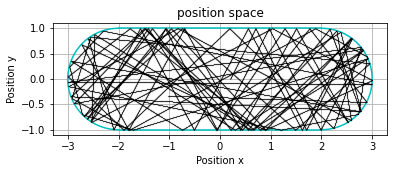

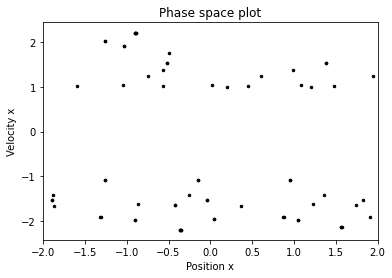

In [14]:
# Initial conditions
x, y, vx, vy, t, alpha = init_vals(x0=0.2,y0=0,vx0=1,vy0=2,alpha=2)
x, y, vx, vy, t, alpha = solve_billball(x,y,vx,vy,t,alpha)    
    
stad_bound(alpha)
plt.plot(x,y,'.k',markersize=.1)
plt.title('position space')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.axis('scaled')
plt.grid()
plt.savefig('billball stadium trajec',dpi=600)
plt.show()

xa,vxa=yzeroxwhat(x,y,vx)
plt.title('Phase space plot')
plt.xlabel('Position x')
plt.ylabel('Velocity x')
plt.xlim(-2,2)


plt.plot(xa,vxa,'.k',markersize=5)
plt.savefig('billball stadium PS',dpi=600)
plt.show()





## For alpha=.01

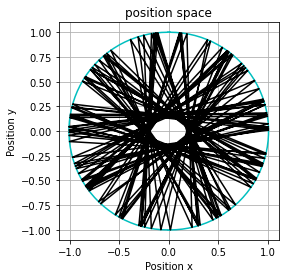

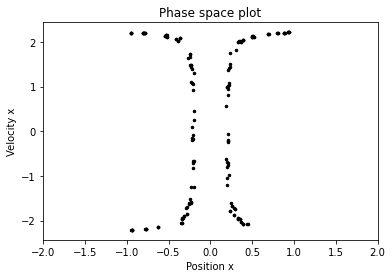

In [9]:
# Initial conditions

x, y, vx, vy, t, alpha = init_vals(x0=0.2,y0=0,vx0=1,vy0=2,alpha=.01)
x, y, vx, vy, t, alpha = solve_billball(x,y,vx,vy,t,alpha)    


stad_bound(alpha)
plt.plot(x,y,'k',markersize=.1)
plt.title('position space')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.axis('scaled')
plt.grid()
plt.savefig('billball stadium trajec',dpi=600)
plt.show()


xa,vxa=yzeroxwhat(x,y,vx)
plt.title('Phase space plot')
plt.xlabel('Position x')
plt.ylabel('Velocity x')
plt.xlim(-2,2)


plt.plot(xa,vxa,'.k',markersize=5)
plt.savefig('billball stadium PS',dpi=600)
plt.show()



## For limit alpha goes to zero i.e Circle


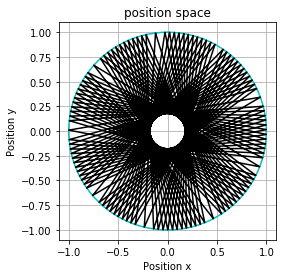

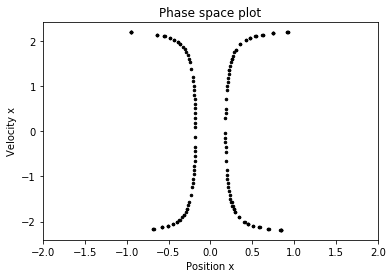

In [780]:
# Initial conditions

x, y, vx, vy, t, alpha = init_vals(x0=0.2,y0=0,vx0=1,vy0=2,alpha=0)
x, y, vx, vy, t, alpha = solve_billball(x,y,vx,vy,t,alpha)    


stad_bound(alpha)
plt.plot(x,y,'k',markersize=.1)
plt.title('position space')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.axis('scaled')
plt.grid()
plt.savefig('billball stadium trajec',dpi=600)
plt.show()


xa,vxa=yzeroxwhat(x,y,vx)
plt.title('Phase space plot')
plt.xlabel('Position x')
plt.ylabel('Velocity x')
plt.xlim(-2,2)


plt.plot(xa,vxa,'.k',markersize=5)
plt.savefig('billball stadium PS',dpi=600)
plt.show()


## Plotting lyapunov coefficient

### For alpha=0

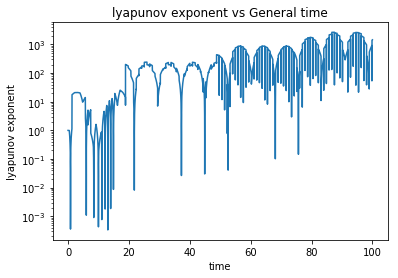

In [781]:
# Initial conditions 1
x, y, vx, vy, t, alpha = init_vals(x0=0.2,y0=0,vx0=1,vy0=2,alpha=0)
x1, y1, vx1, vy1, t1, alpha = solve_billball(x,y,vx,vy,t,alpha)    

# Initial conditions 2
x, y, vx, vy, t, alpha = init_vals(x0=0.2+10**(-5),y0=0,vx0=1,vy0=2,alpha=0)
x2, y2, vx2, vy2, t2, alpha = solve_billball(x,y,vx,vy,t,alpha)    

plt.semilogy(t2,abs((x1-x2)*100000),markersize=.1)

plt.title('lyapunov exponent vs General time')
plt.xlabel('time')
plt.ylabel('lyapunov exponent')
plt.show()


## for alpha=.1

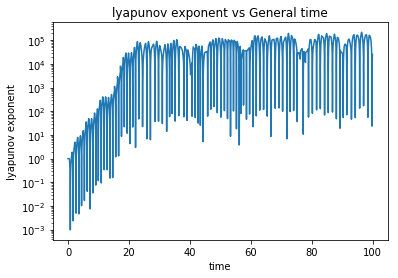

In [782]:
# Initial conditions 1
x, y, vx, vy, t, alpha = init_vals(x0=0.2,y0=0,vx0=1,vy0=2,alpha=0.1)
x1, y1, vx1, vy1, t1, alpha = solve_billball(x,y,vx,vy,t,alpha)    

# Initial conditions 2
x, y, vx, vy, t, alpha = init_vals(x0=0.2+10**-5,y0=0,vx0=1,vy0=2,alpha=0.1)
x2, y2, vx2, vy2, t2, alpha = solve_billball(x,y,vx,vy,t,alpha)    

plt.semilogy(t2,abs((x1-x2)*100000))
plt.title('lyapunov exponent vs General time')
plt.xlabel('time')
plt.ylabel('lyapunov exponent')
plt.show()
         
   


## For alpha=0.01

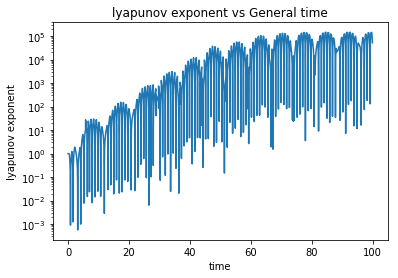

In [783]:
# Initial conditions 1
x, y, vx, vy, t, alpha = init_vals(x0=0.2,y0=0,vx0=1,vy0=2,alpha=0.01)
x1, y1, vx1, vy1, t1, alpha = solve_billball(x,y,vx,vy,t,alpha)    

# Initial conditions 2
x, y, vx, vy, t, alpha = init_vals(x0=0.2+10**-5,y0=0,vx0=1,vy0=2,alpha=0.01)
x2, y2, vx2, vy2, t2, alpha = solve_billball(x,y,vx,vy,t,alpha)    

t=np.linspace(0,200,N)

plt.semilogy(t2,abs((x1-x2)*100000))
plt.title('lyapunov exponent vs General time')
plt.xlabel('time')
plt.ylabel('lyapunov exponent')
plt.show()
